<a href="https://colab.research.google.com/github/Diveesha909/BiokindAnalytics/blob/main/Geopandas_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/BioKind-DiaperVillage/Datasets"

AccountsWithoutTransactions.csv  LYBUNT.csv		online_donations.csv  zcta
active_recurring_donations.csv	 offline_donations.csv	tl_2024_us_state      zipcodes_us.csv


# Preprocessing & Imports

In [ ]:
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import geopandas as gpd
import pandas as pd

In [ ]:
LYBUNT = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/offline_donations.csv')


In [ ]:
# load dataset
offline_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/offline_donations.csv')

print('Offline Donation Columns:')
print(offline_df.columns)

print('-----------------------------------------------------------------------')

# load dataset
online_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/online_donations.csv')

print('Online Donation Columns:')
print(online_df.columns)

offline_df['Donation Type'] = 'Offline'
offline_df['online'] = 0

online_df['Donation Type'] = 'Online'
online_df['online'] = 1

online_offline_df = pd.concat([offline_df, online_df], ignore_index=True)
online_offline_df.head()

Offline Donation Columns:
Index(['Donation ID', 'Account ID', 'Shopping Cart ID', 'Campaign ID',
       'Donation Amount', 'Donation Date', 'Account Type', 'Full Name (F)',
       'Company Name', 'Address Line 1', 'City', 'State/Province', 'Zip Code',
       'Campaign Name', 'Purpose', 'Fund', 'Tender Type',
       'Tribute Full Name (F)', 'Unnamed: 18'],
      dtype='object')
-----------------------------------------------------------------------
Online Donation Columns:
Index(['Donation ID', 'Account ID', 'Shopping Cart ID', 'Campaign ID',
       'Donation Amount', 'Donation Date', 'Account Type', 'Full Name (F)',
       'Company Name', 'Address Line 1', 'City', 'State/Province', 'Zip Code',
       'Campaign Name', 'Purpose', 'Fund', 'Tender Type',
       'Tribute Full Name (F)', 'Unnamed: 18'],
      dtype='object')


,Donation ID,Account ID,Shopping Cart ID,Campaign ID,Donation Amount,Donation Date,Account Type,Full Name (F),Company Name,Address Line 1,...,State/Province,Zip Code,Campaign Name,Purpose,Fund,Tender Type,Tribute Full Name (F),Unnamed: 18,Donation Type,online
0,5862,5122,5914,13,595.00,02/23/2023,Company,Jane Braatz,100+ Women Who Care,w10890 Cty Rd V,...,WI,53955,2023 NBC15 Diaper Drive,General Operating,Unrestricted,Check,NaN,NaN,Offline,0
1,8126,7048,8206,17,100.00,02/22/2024,Individual,KATHLEEN A BALTES,NaN,1200 Holtan Road,...,WI,53589,2024 WMTV Diaper Drive,General Operating,Unrestricted,PayPal,NaN,NaN,Offline,0
2,5646,4908,5698,13,25.00,02/23/2023,Individual,Margaret A Listug,NaN,NaN,...,NaN,53589,2023 NBC15 Diaper Drive,General Operating,Unrestricted,PayPal,NaN,NaN,Offline,0
3,7197,6119,7277,17,50.00,02/22/2024,Individual,Becky A Peura,NaN,"2081 Yahara Dr,",...,WI,53589-3364,2024 WMTV Diaper Drive,General Operating,Unrestricted,PayPal,NaN,NaN,Offline,0
4,8985,5934,9064,15,310.89,09/15/2023,Individual,Emily Adams,NaN,141 London Rd,...,WI,53531,2023 Bottoms Up Ball,General Operating,Unrestricted,Other,NaN,NaN,Offline,0


# GeoPandas: Zip Codes in the United States

In [ ]:
zipcodes_us = gpd.read_file('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/zcta/tl_2024_us_zcta520.shp')
print(zipcodes_us.head())

fig, ax = plt.subplots(figsize=(10, 10))
zipcodes_us.plot(ax=ax)
ax.set_xlim(-128,-65)
ax.set_ylim(24,50)

plt.show()

  ZCTA5CE20 GEOID20       GEOIDFQ20 CLASSFP20 MTFCC20 FUNCSTAT20  ALAND20  \
0     47236   47236  860Z200US47236        B5   G6350          S  1029063   
1     47870   47870  860Z200US47870        B5   G6350          S     8830   
2     47851   47851  860Z200US47851        B5   G6350          S    53326   
3     47337   47337  860Z200US47337        B5   G6350          S   303089   
4     47435   47435  860Z200US47435        B5   G6350          S    13302   

   AWATER20   INTPTLAT20    INTPTLON20  \
0         0  +39.1517426  -085.7252769   
1         0  +39.3701518  -087.4735141   
2         0  +39.5735839  -087.2459559   
3         0  +39.8027537  -085.4372850   
4         0  +39.2657557  -086.2951577   

                                            geometry  
0  POLYGON ((-85.7341 39.15597, -85.72794 39.1561...  
1  POLYGON ((-87.47414 39.37016, -87.47409 39.370...  
2  POLYGON ((-87.24769 39.5745, -87.24711 39.5744...  
3  POLYGON ((-85.44357 39.80328, -85.44346 39.803...  
4  POLYGO

# Geo-spatial Analysis

## Total Number of Donations

### Visualizing the Total Number of Donations(Online and Offline)

In [ ]:
num_donations_by_zipcode = online_offline_df['Zip Code'].value_counts()
num_donations_by_zipcode

In [ ]:
zipcode_counts = zipcodes_us.merge(num_donations_by_zipcode, how='left', left_on='ZCTA5CE20', right_on='Zip Code')
zipcode_counts['count'].fillna(0, inplace=True)
zipcode_counts

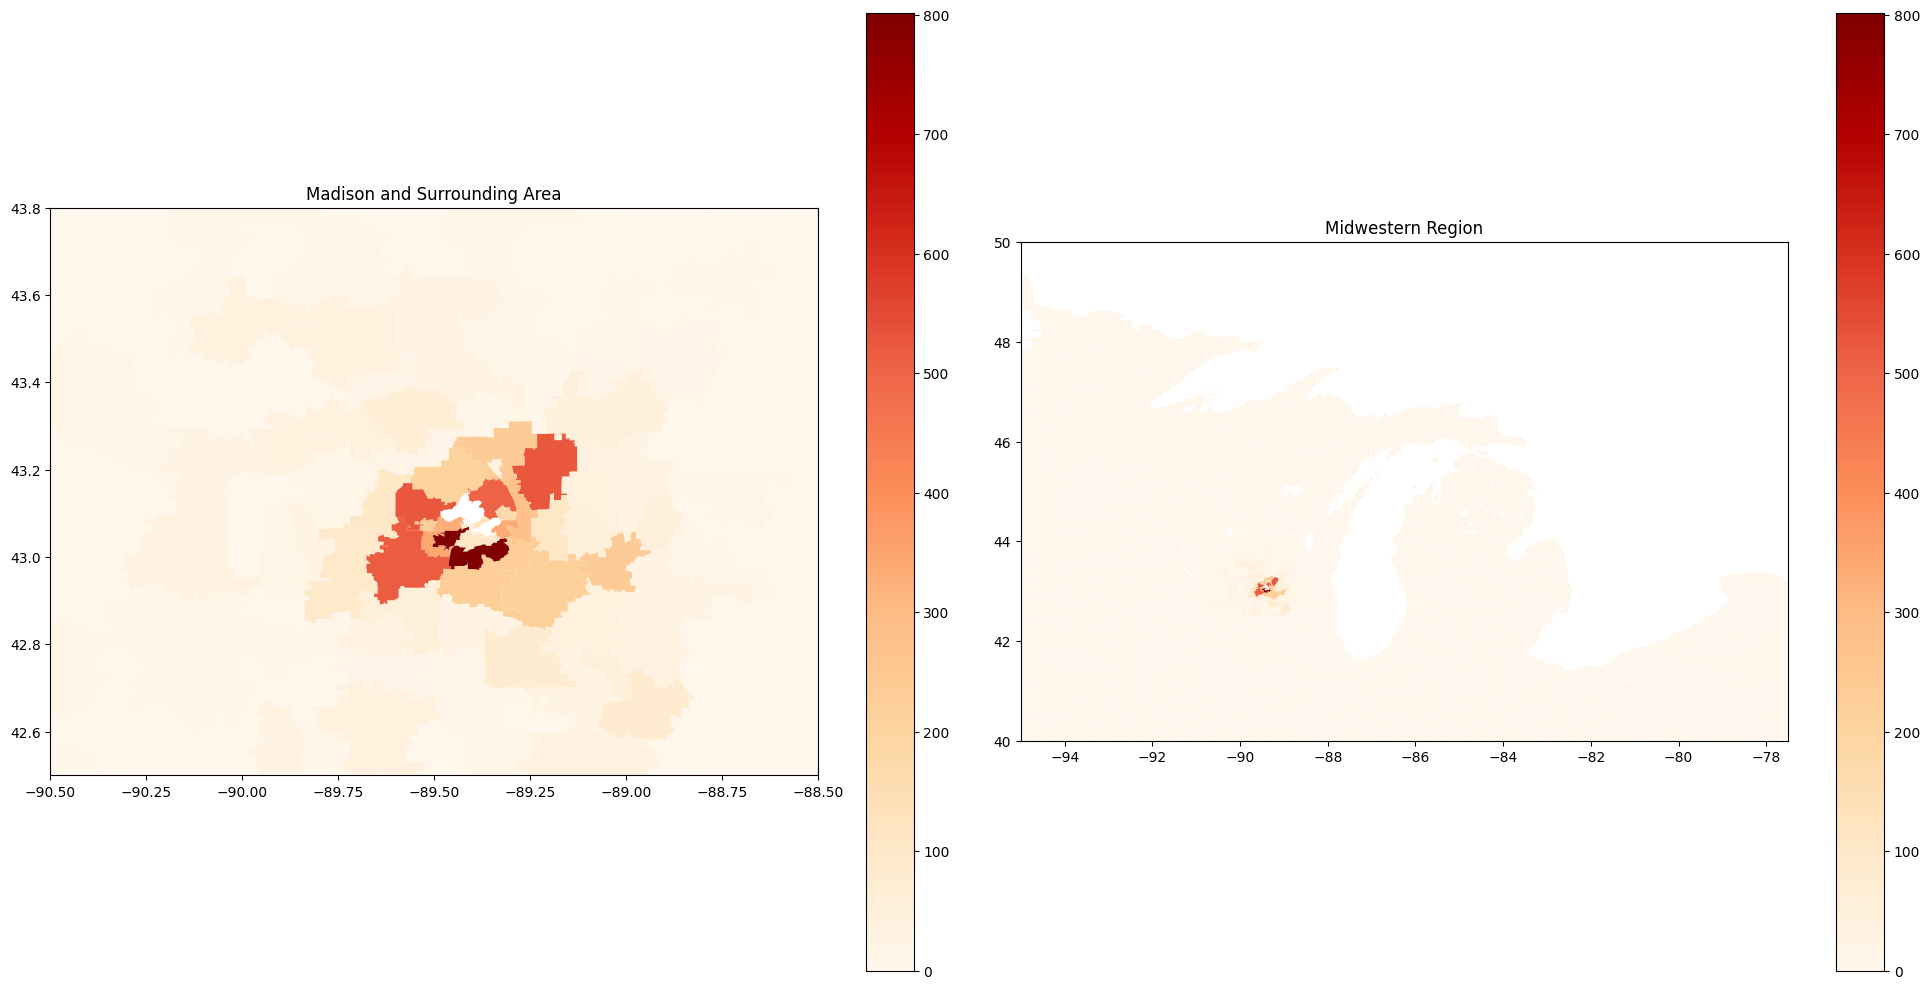

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

zipcode_counts.plot(ax=ax1, column='count', cmap='OrRd', legend=True)
ax2.set_xlim(-95, -77.5)
ax2.set_ylim(40, 50)
ax2.set_title("Midwestern Region")

zipcode_counts.plot(ax=ax2, column='count', cmap='OrRd', legend=True)
ax1.set_xlim(-90.5, -88.5)
ax1.set_ylim(42.5, 43.8)
ax1.set_title("Madison and Surrounding Area")

plt.tight_layout()
plt.show()

### Visualizing the Total Amount Donated by Zip Code

In [ ]:
total_amount_donated_by_zipcode = online_offline_df.groupby('Zip Code')['Donation Amount'].sum()
total_amount_donated_by_zipcode

,Donation Amount
Zip Code,
0,569.96
01801,309.27
01810,150.00
02128,51.80
02472,200.00
...,...
98112,450.00
98134,600.00
99835,25.62


In [ ]:
zipcode_amounts = zipcodes_us.merge(total_amount_donated_by_zipcode, how='left', left_on='ZCTA5CE20', right_on='Zip Code')
zipcode_amounts['Donation Amount'].fillna(0, inplace=True)
zipcode_amounts

<ipython-input-11-8587428aa356>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zipcode_amounts['Donation Amount'].fillna(0, inplace=True)


,ZCTA5CE20,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Donation Amount
0,47236,47236,860Z200US47236,B5,G6350,S,1029063,0,+39.1517426,-085.7252769,"POLYGON ((-85.7341 39.15597, -85.72794 39.1561...",0.0
1,47870,47870,860Z200US47870,B5,G6350,S,8830,0,+39.3701518,-087.4735141,"POLYGON ((-87.47414 39.37016, -87.47409 39.370...",0.0
2,47851,47851,860Z200US47851,B5,G6350,S,53326,0,+39.5735839,-087.2459559,"POLYGON ((-87.24769 39.5745, -87.24711 39.5744...",0.0
3,47337,47337,860Z200US47337,B5,G6350,S,303089,0,+39.8027537,-085.4372850,"POLYGON ((-85.44357 39.80328, -85.44346 39.803...",0.0
4,47435,47435,860Z200US47435,B5,G6350,S,13302,0,+39.2657557,-086.2951577,"POLYGON ((-86.29592 39.26547, -86.29592 39.266...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33786,37932,37932,860Z200US37932,B5,G6350,S,75093217,4374995,+35.9172993,-084.1987873,"POLYGON ((-84.27347 35.93928, -84.27287 35.940...",0.0
33787,37341,37341,860Z200US37341,B5,G6350,S,87434962,27139990,+35.2199309,-085.0730025,"POLYGON ((-85.1509 35.11231, -85.15088 35.1123...",0.0
33788,37849,37849,860Z200US37849,B5,G6350,S,102931713,896866,+36.0540502,-084.0484876,"POLYGON ((-84.14857 36.04234, -84.1424 36.0468...",0.0
33789,37754,37754,860Z200US37754,B5,G6350,S,99003113,145391,+36.1390993,-084.0298007,"POLYGON ((-84.10549 36.11168, -84.10543 36.111...",0.0


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

zipcode_amounts.plot(ax=ax1, column='Donation Amount', cmap='OrRd', legend=True)
ax2.set_xlim(-95, -77.5)
ax2.set_ylim(40, 50)
ax2.set_title("Midwestern Region")

zipcode_amounts.plot(ax=ax2, column='Donation Amount', cmap='OrRd', legend=True)
ax1.set_xlim(-90.5, -88.5)
ax1.set_ylim(42.5, 43.8)
ax1.set_title("Madison and Surrounding Area")

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

import pandas as pd

data = [
    (153069, "Okauchee, WI", "Previously unranked", 114141, 115568),
    (253122, "Elm Grove, WI", "#1", 119512, 113750),
    (353097, "Mequon, WI", "#2", 105865, 107667),
    (453017, "Colgate, WI", "#3", 104658, 106577),
    (553076, "Richfield, WI", "#8", 95441, 103000),
    (653045, "Brookfield, WI", "#7", 96160, 100438),
    (754942, "Greenville, WI", "#11", 93474, 100344),
    (853217, "Milwaukee, WI", "#5", 98750, 100262),
    (953593, "Verona, WI", "#4", 102320, 99578),
    (1053183, "Wales, WI", "#12", 93281, 99095),
    (1153571, "Morrisonville, WI", "#9", 95268, 98929),
    (1253597, "Waunakee, WI", "#15", 92647, 98519),
    (1354169, "Sherwood, WI", "#6", 97269, 97969),
    (1453018, "Delafield, WI", "Previously unranked", 92832, 97482),
    (1553005, "Brookfield, WI", "#16", 91802, 97202),
    (1653092, "Thiensville, WI", "#10", 93619, 96627),
    (1753527, "Cottage Grove, WI", "Previously unranked", 88600, 92882),
    (1853058, "Nashotah, WI", "Previously unranked", 86745, 92792),
    (1953033, "Hubertus, WI", "#20", 84867, 92620),
    (2053575, "Oregon, WI", "#24", 83913, 92274),
    (2153029, "Hartland, WI", "#22", 84412, 91435),
    (2253558, "Mc Farland, WI", "#35", 81994, 90333),
    (2353153, "North Prairie, WI", "#33", 82159, 90250),
    (2454016, "Hudson, WI", "#21", 84595, 89518),
    (2553012, "Cedarburg, WI", "#23", 84301, 88844),
    (2653119, "Eagle, WI", "#30", 83125, 87553),
    (2753089, "Sussex, WI", "#36", 81988, 87106),
    (2853189, "Waukesha, WI", "#32", 82166, 87062),
    (2953149, "Mukwonago, WI", "#31", 82766, 86899),
    (3053103, "Big Bend, WI", "#28", 83487, 86809),
    (3153185, "Waterford, WI", "#26", 83842, 86729),
    (3254171, "Sobieski, WI", "#13", 93125, 86463),
    (3353066, "Oconomowoc, WI", "#27", 83513, 86343),
    (3453528, "Cross Plains, WI", "#19", 85071, 86301),
    (3553150, "Muskego, WI", "#39", 81317, 85744),
    (3653002, "Allenton, WI", "#63", 75357, 85478),
    (3753521, "Brooklyn, WI", "#29", 83138, 85305),
    (3854021, "Prescott, WI", "#34", 82089, 83858),
    (3953146, "New Berlin, WI", "#25", 83898, 83586),
    (4053049, "Malone, WI", "#41", 80435, 83191),
    (4153508, "Belleville, WI", "#37", 81792, 82778),
    (4253021, "Fredonia, WI", "#55", 76106, 82750),
    (4354927, "Butte Des Morts, WI", "Previously unranked", 75750, 82708),
    (4454023, "Roberts, WI", "#40", 80766, 82500),
    (4553072, "Pewaukee, WI", "#47", 77627, 82032),
    (4654947, "Larsen, WI", "#45", 78333, 81638),
    (4753507, "Barneveld, WI", "#56", 76098, 81406),
    (4853093, "Waldo, WI", "#49", 76875, 80938),
    (4953529, "Dane, WI", "#46", 77794, 80625),
    (5054173, "Suamico, WI", "#80", 73050, None)
]

pdf = pd.DataFrame(data, columns=["Zip_Code", "City", "Previous_Rank", "Previous_Income", "Current_Income"])
# print(pdf)


# Merge zipcode_amounts with the income dataframe
zipcode_income = zipcode_amounts.merge(pdf, left_on='Zip_Code', right_on='Zip_Code', how='left')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Left map: Donation Amounts
zipcode_amounts.plot(ax=ax1, column='Donation Amount', cmap='OrRd', legend=True)
ax1.set_xlim(-90.5, -88.5)
ax1.set_ylim(42.5, 43.8)
ax1.set_title("Madison and Surrounding Area")

# Right map: Current Income
zipcode_income.plot(ax=ax2, column='Current_Income', cmap='OrRd', legend=True)
ax2.set_xlim(-95, -77.5)
ax2.set_ylim(40, 50)
ax2.set_title("Midwestern Region - Income Levels")

plt.tight_layout()
plt.show()


KeyError: 'Zip_Code'

### Visualizing the Average Donation Amount per Donation by Zip Code

In [ ]:
avg_donation_val_by_zipcode = total_amount_donated_by_zipcode.to_frame().merge(num_donations_by_zipcode.to_frame(), how='left', left_on='Zip Code', right_on='Zip Code')
avg_donation_val_by_zipcode['Average Donation Amount'] = avg_donation_val_by_zipcode['Donation Amount'] / avg_donation_val_by_zipcode['count']
avg_donation_val_by_zipcode

In [ ]:
zipcode_avg_amounts = zipcodes_us.merge(avg_donation_val_by_zipcode, how='left', left_on='ZCTA5CE20', right_on='Zip Code')
zipcode_avg_amounts['Average Donation Amount'].fillna(0, inplace=True)
zipcode_avg_amounts['Average Donation Amount'].sort_values(ascending=False)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

(ax1, ax2), (ax3, ax4) = axes

zipcode_avg_amounts.plot(ax=ax1, column='Average Donation Amount', cmap='OrRd', legend=True)
ax1.set_xlim(-100, -70)
ax1.set_ylim(25, 50)
ax1.set_title("Average Donation Amounts")

zipcode_amounts.plot(ax=ax2, column='Donation Amount', cmap='OrRd', legend=True)
ax2.set_xlim(-90.5, -88.5)
ax2.set_ylim(42.5, 43.8)
ax2.set_title("Total Donation Amounts")

zipcode_counts.plot(ax=ax3, column='count', cmap='OrRd', legend=True)
ax3.set_xlim(-90.5, -88.5)
ax3.set_ylim(42.5, 43.8)
ax3.set_title("Total Number of Donations")

ax4.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
unique_donors=online_offline_df.groupby('Zip Code').agg({'Account ID':'nunique'})
unique_donors

1) Look at unique donors against zipcode
2) Company vs individual -- counts, plot against zip code
3) Offline vs online -- counts, plot against zip code
4) County wise donations??


In [ ]:
zipcode_unique_donor = zipcodes_us.merge(unique_donors, how='left', left_on='ZCTA5CE20', right_on='Zip Code')
zipcode_unique_donor['Account ID'].fillna(0, inplace=True)
zipcode_unique_donor

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

zipcode_unique_donor.plot(ax=ax1, column='Account ID', cmap='OrRd', legend=True)
ax2.set_xlim(-95, -77.5)
ax2.set_ylim(40, 50)
ax2.set_title("Midwestern Region")

zipcode_unique_donor.plot(ax=ax2, column='Account ID', cmap='OrRd', legend=True)
ax1.set_xlim(-90.5, -88.5)
ax1.set_ylim(42.5, 43.8)
ax1.set_title("Madison and Surrounding Area")

plt.tight_layout()
plt.show()

In [ ]:
online_offline_df.columns

In [ ]:
offline_df['Donation Type'] = 'Offline'
offline_df['online'] = 0

online_df['Donation Type'] = 'Online'
online_df['online'] = 1

offline_df


In [ ]:
online_offline_df['Account Type Test'] = online_offline_df['Account Type'].apply(lambda x: 0 if x == 'Company' else 1)


online_offline_df['Donation Type Test'] = online_offline_df['Donation Type'].apply(lambda x: 1 if x == 'Online' else 0)


online_offline_df.head()



*   Look at unique donors against zipcode
*   Company vs individual -- counts, plot against zip code

*   Offline vs online -- counts, plot against zip code
*   County wise donations??





In [ ]:
# Assuming 'online_offline_df' is your DataFrame containing donation data
account_type_by_zipcode = online_offline_df.groupby(['Zip Code', 'Account Type'])['Account ID'].count().reset_index()
account_type_by_zipcode.rename(columns={'Account ID': 'Count'}, inplace=True)

In [ ]:
fig = px.bar(account_type_by_zipcode, x='Zip Code', y='Count', color='Account Type',
             title='Donation Counts by Account Type and Zip Code',
             labels={'Count': 'Number of Donations'},
             barmode='group')  # 'group' for side-by-side bars, 'stack' to stack them

fig.show()

In [ ]:
accoun

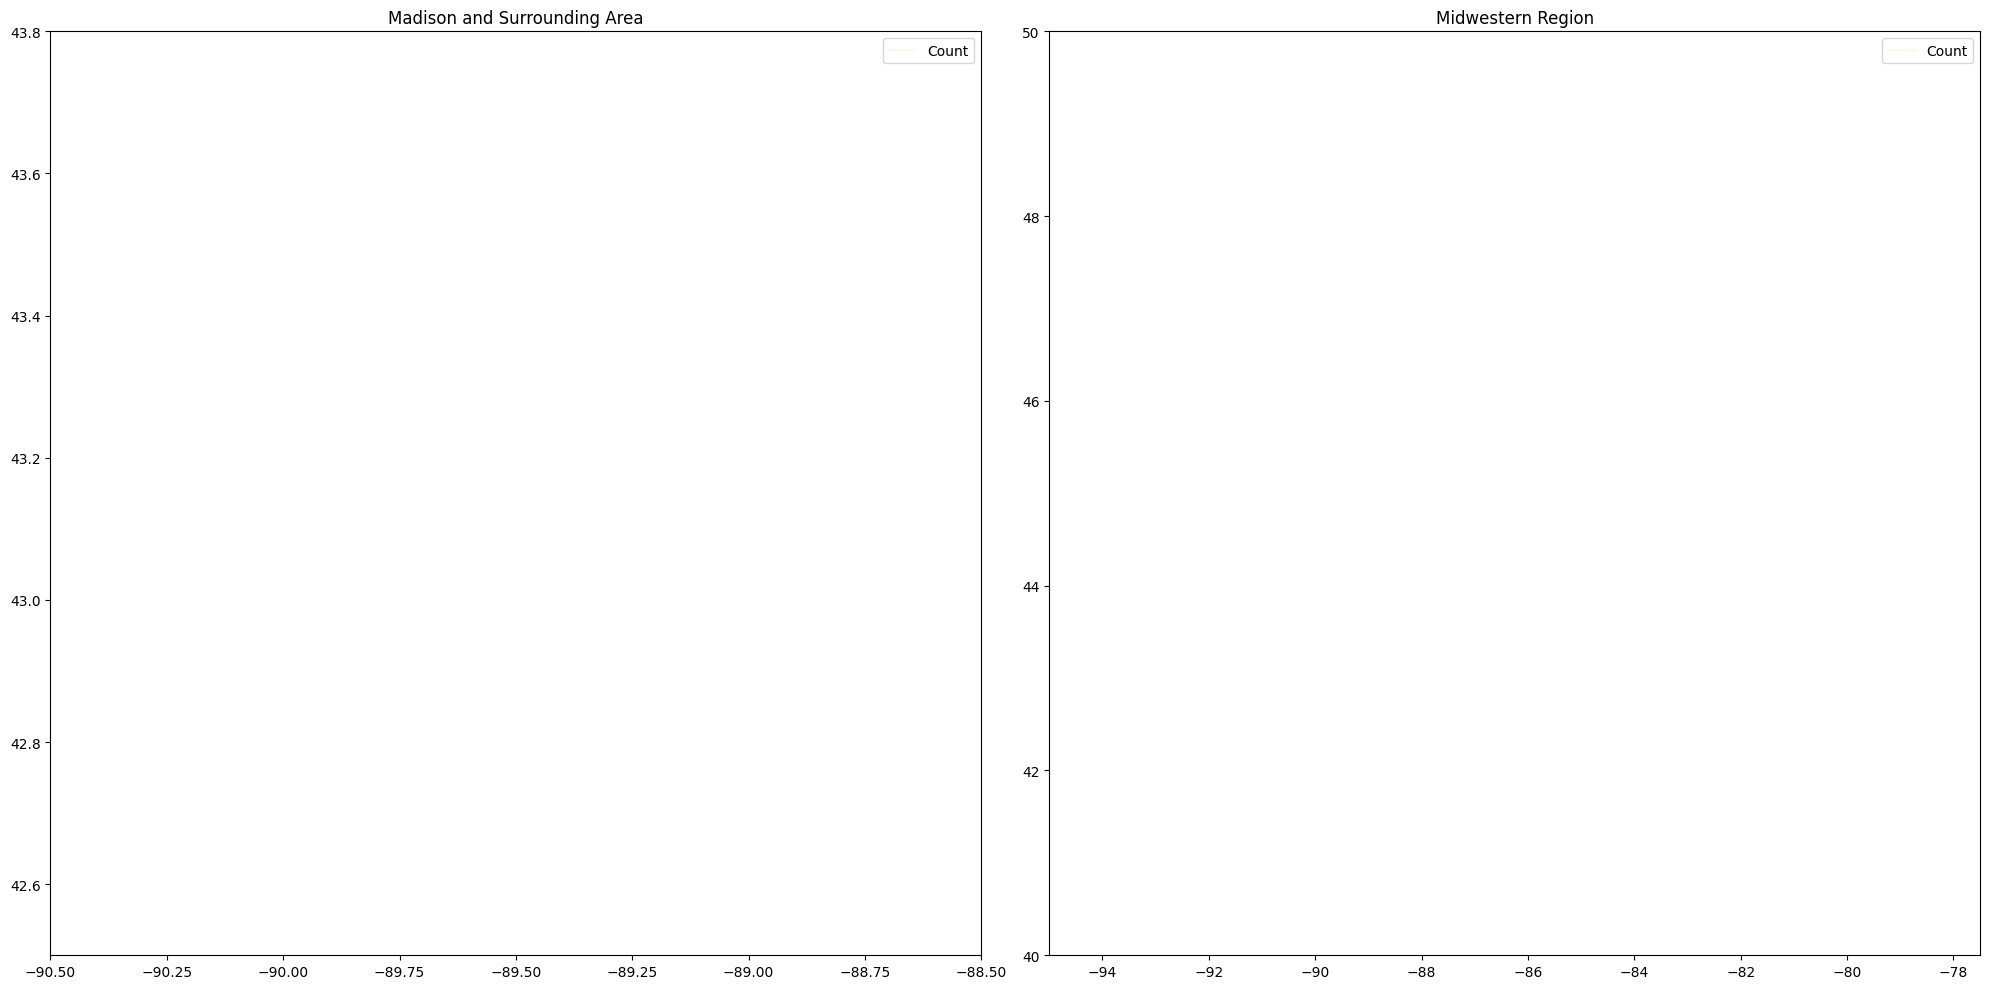

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))


account_type_by_zipcode.plot(ax=ax1, column='Account Type', cmap='OrRd', legend=True)
ax2.set_xlim(-95, -77.5)
ax2.set_ylim(40, 50)
ax2.set_title("Midwestern Region")

account_type_by_zipcode.plot(ax=ax2, column='Account Type', cmap='OrRd', legend=True)
ax1.set_xlim(-90.5, -88.5)
ax1.set_ylim(42.5, 43.8)
ax1.set_title("Madison and Surrounding Area")


plt.tight_layout()
plt.show()

In [ ]:
# Merge with zipcodes_us GeoDataFrame
account_type_geo = zipcodes_us.merge(account_type_by_zipcode, left_on='ZCTA5CE20', right_on='Zip Code', how='left')

# Fill NaN values in the 'Count' column with 0 (for zip codes with no donations)
account_type_geo['Count'].fillna(0, inplace=True)

<ipython-input-19-e61924547823>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
!pip install mapclassify>=2.4.0 # Installing mapclassify package with version >= 2.4.0

import mapclassify # Importing the mapclassify module
import geopandas as gpd
import matplotlib.pyplot as plt




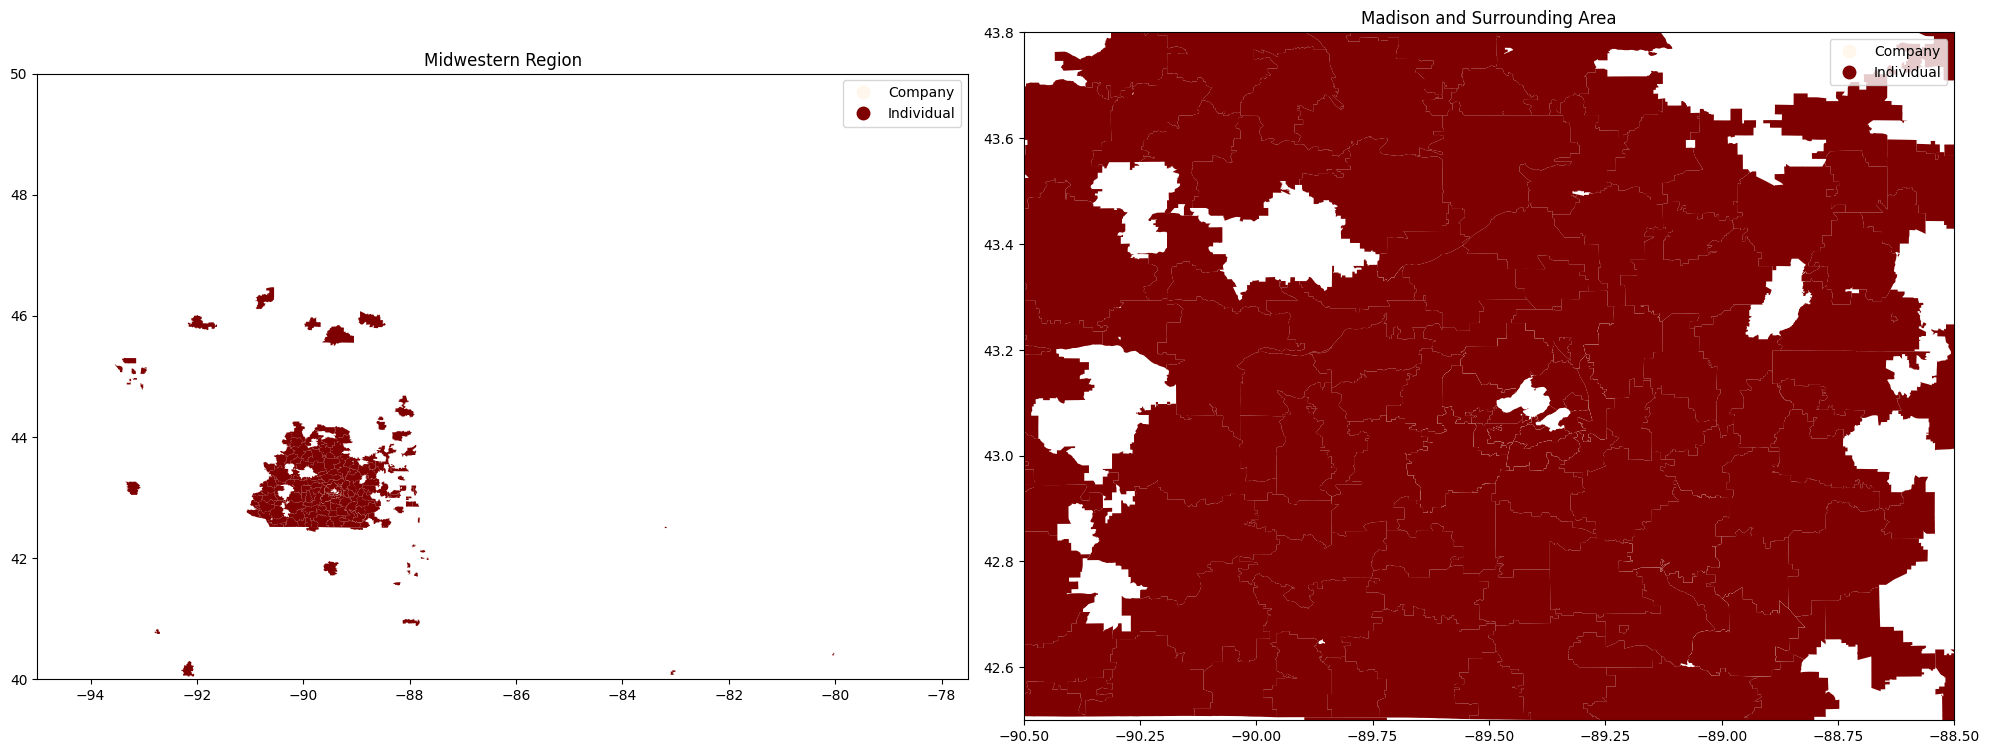

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot for Midwestern Region
account_type_geo.plot(ax=ax1, column='Account Type', cmap='OrRd', legend=True)
ax1.set_xlim(-95, -77.5)  # Set longitude limits for Midwestern region
ax1.set_ylim(40, 50)  # Set latitude limits for Midwestern region
ax1.set_title("Midwestern Region")

# Plot for Madison and Surrounding Area
account_type_geo.plot(ax=ax2, column='Account Type', cmap='OrRd', legend=True)
ax2.set_xlim(-90.5, -88.5)  # Set longitude limits for Madison area
ax2.set_ylim(42.5, 43.8)  # Set latitude limits for Madison area
ax2.set_title("Madison and Surrounding Area")

plt.tight_layout()